# PRACTICAL 5: Apply Linear Regression on crime dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_excel('3A.3 Women & Girls Victims of Rape - 2020.xlsx')[0:36][['State/UT','Total Women\n/ Adult Victims','Total']].set_index('State/UT')
df = df.rename(columns={'Total Women\n/ Adult Victims': 'Adult Victims','Total':'Total Victims'})
df.head(10)

,Adult Victims,Total Victims
State/UT,,
Andhra Pradesh,520.0,1107
Arunachal Pradesh,34.0,63
Assam,1640.0,1658
Bihar,805.0,806
Chhattisgarh,1199.0,1212
Goa,19.0,61
Gujarat,486.0,486
Haryana,1373.0,1373
Himachal Pradesh,135.0,332


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Adult Victims,36.0,708.277778,911.338313,1.0,18.75,462.0,1144.50,4058.0
Total Victims,36.0,782.027778,1066.832253,2.0,53.25,486.5,1148.75,5337.0


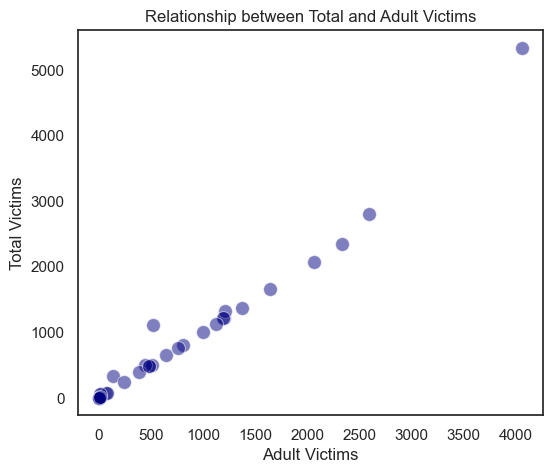

In [4]:
# plotting the relationship between total and adult victims

sns.set_theme(style = 'white')
plt.figure(figsize=(6,5))
sns.scatterplot(data=df,x='Adult Victims',y='Total Victims',s=100,alpha=0.5,color='navy')
plt.title('Relationship between Total and Adult Victims')
plt.xlabel('Adult Victims')
plt.ylabel('Total Victims')
plt.show()

In [5]:
# train test split
# 20% data points as test data

X,y = np.array(df['Adult Victims']).reshape(-1,1),np.array(df['Total Victims'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [6]:
# creating model

model = LinearRegression()

In [7]:
# training the model

model.fit(X_train,y_train)

LinearRegression()

In [8]:
# testing

# predicting on testing data
test_pred = model.predict(X_test)

# predicting on training data
train_pred = model.predict(X_train)

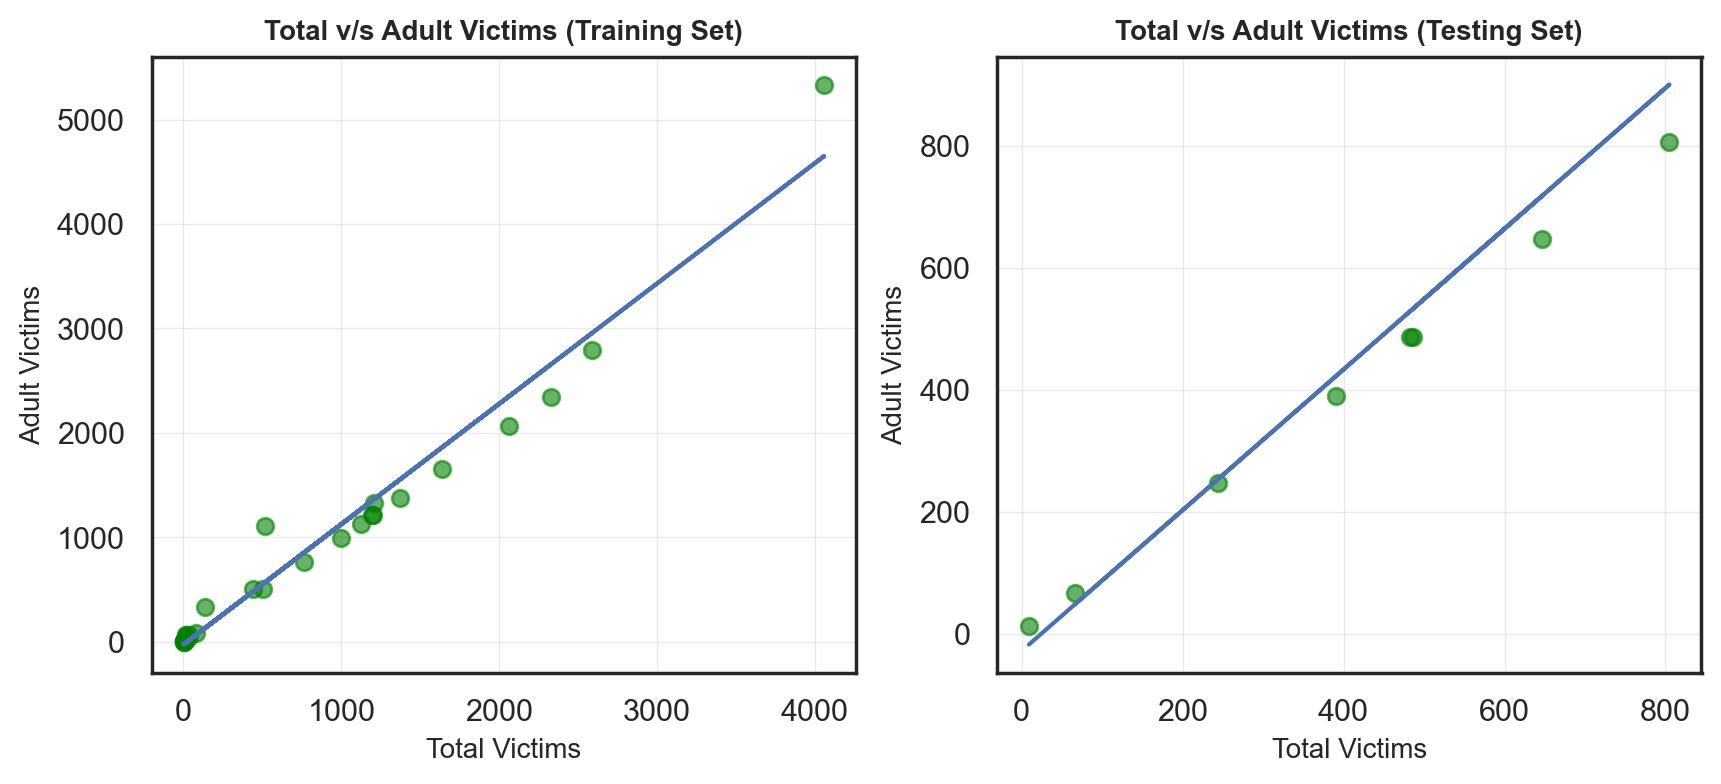

In [9]:
# visualizing linear regression

fig,ax = plt.subplots(1,2,figsize=(10,4),dpi=200)

ax[0].plot(X_train,train_pred)
ax[0].scatter(X_train,y_train,color='green',alpha=0.6)
ax[0].grid(True,alpha=0.4,lw=0.5)
ax[0].set_xlabel('Total Victims',fontsize=10)
ax[0].set_ylabel('Adult Victims',fontsize=10)
ax[0].set_title('Total v/s Adult Victims (Training Set)',fontsize=10,fontweight='bold')

ax[1].plot(X_test,test_pred)
ax[1].scatter(X_test,y_test,color='green',alpha=0.6)
ax[1].grid(True,alpha=0.4,lw=0.5)
ax[1].set_xlabel('Total Victims',fontsize=10)
ax[1].set_ylabel('Adult Victims',fontsize=10)
ax[1].set_title('Total v/s Adult Victims (Testing Set)',fontsize=10,fontweight='bold')

plt.show()

In [10]:
# linear regression equation for this model

print('Total_Victims = {}*Adult_Victims + {}'.format(model.coef_[0],model.intercept_))

Total_Victims = 1.1528683492417635*Adult_Victims + -27.804003721035997


In [11]:
# evaluating performance of this model by computing RMSE

from sklearn.metrics import mean_squared_error
import math

performance_rmse = math.sqrt(mean_squared_error(y_test,test_pred))
performance_rmse

50.127757053535355